In [ ]:
void bfs(int src){
    vector<bool> vis(n,0);
	queue<int> q;
	q.push(src);
	vis[src]=1;
	while(q.size()){
		int x=q.front(); 
        q.pop();
		for(int y: al[x]){
			if(vis[y]){
                continue;
            } 
			vis[y]=1;
			q.push(y);
		}
	}
}

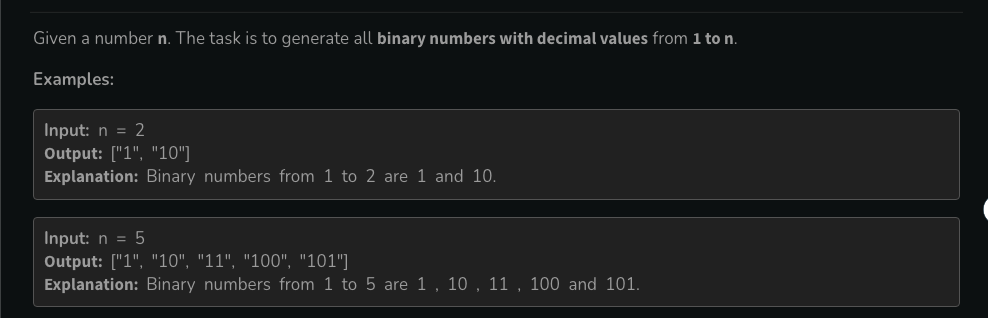    
https://www.geeksforgeeks.org/problems/generate-binary-numbers-1587115620/1

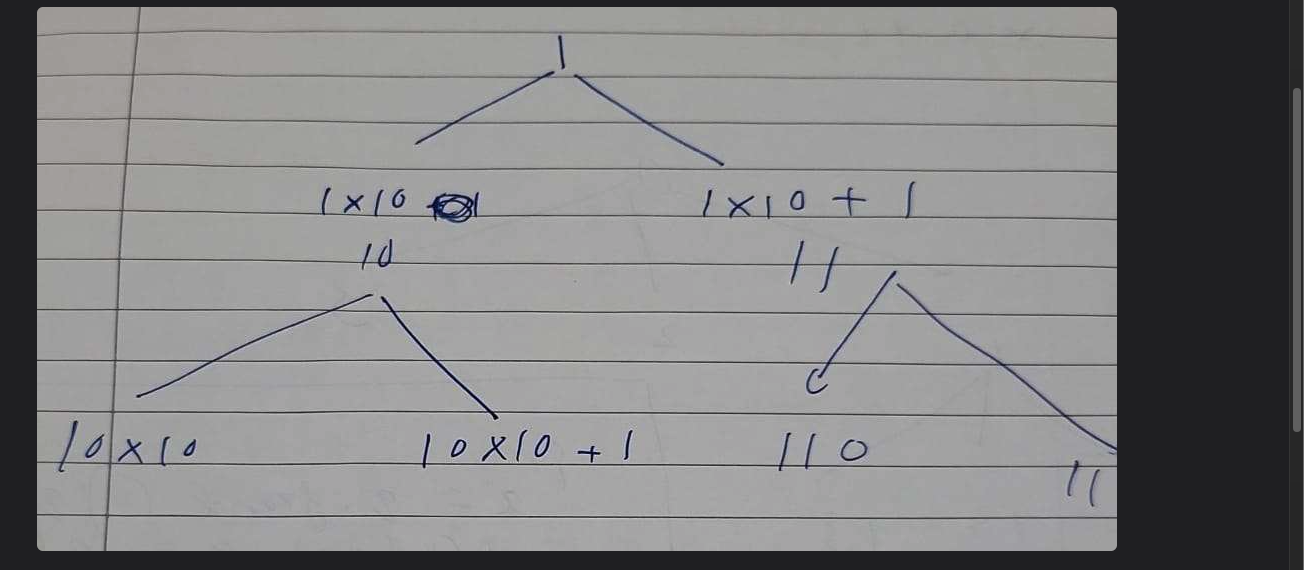

In [ ]:

vector<string> generate(int n){
    vector<string> ans;
    queue<long long> q;
    q.push(1ll);
    while(n--){
        long long x=q.front();
        q.pop();
        ans.push_back(to_string(x));
        q.push(x*10);
        q.push(x*10+1);
    }
    return ans;
}

https://leetcode.com/problems/shortest-path-in-binary-matrix/description/   
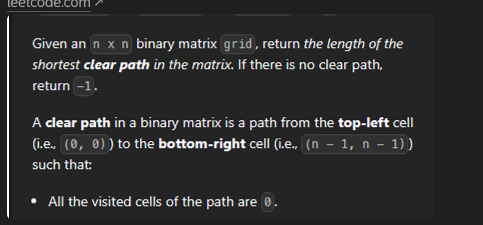

In dp we used to find no. of ways, here we have to find the smalleest path

In [ ]:
bool isValid(int r, int c , int rr, int cc){
    return r>=0 and r<rr and c>=0 and c<cc;	
}

void bfs(vector<vector<int>>& grid, int &ans){
    int n=grid.size();
    int rr=n,cc=n;
    grid[0][0]=1;
    //make it visited
    queue<vector<int>> q;
    q.push({0,0,1});
    vector<vector<int>> king={{1,0},{-1,0},{0,1},{0,-1},{1,-1},{1,1},{-1,1},{-1,-1}};
    while(q.size()){
        auto v=q.front();
        q.pop();
        int r=v[0],c=v[1],d=v[2];
        if(r==n-1 and c==n-1){
            ans=v[2];
            break;
        }
        for(auto vv: king){
            int tr=r+vv[0],tc=c+vv[1];
            if(!isValid(tr,tc,rr,cc) or grid[tr][tc]){
                continue;
            } 
            grid[tr][tc]=1;
            q.push({tr,tc,d+1});
        }
    }   
}   

int shortestPathBinaryMatrix(vector<vector<int>>& grid) {
    if(grid[0][0]){
        return -1;
    } 
    int ans=-1;
    bfs(grid,ans);
    return ans;
}


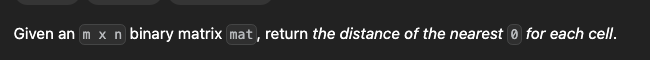    
https://leetcode.com/problems/01-matrix/description/

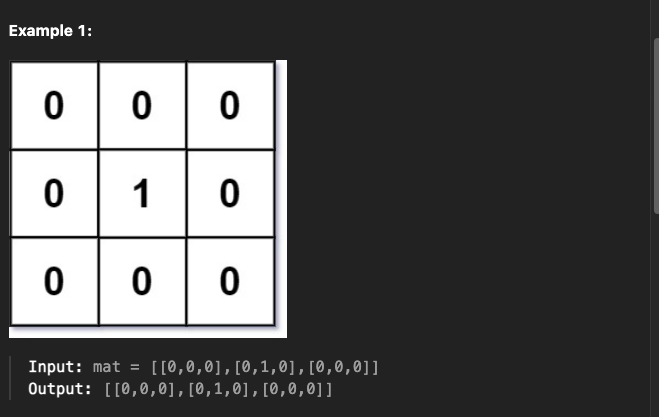

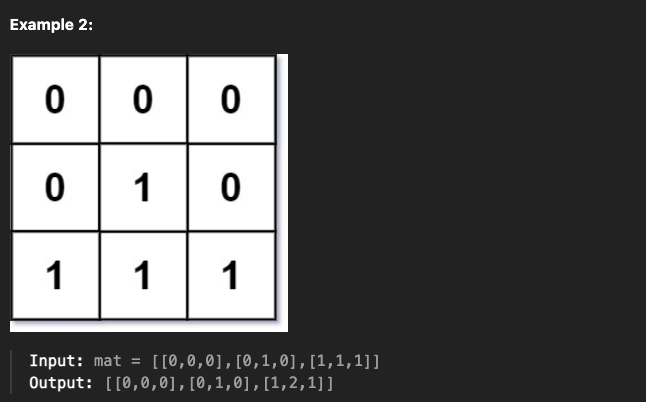

for each 1, find the nearest 0

In [ ]:
class Solution { 
    public: 
        bool isValid(int r, int c , int rr, int cc){
            return r>=0 and r<rr and c>=0 and c<cc;	
        }
    
        void bfs(vector<vector<int>>& ma){
            // for each 1, find the nearest 0
            int rr=ma.size(),cc=ma[0].size();
            queue<vector<int>> q;
            for(int r=0;r<rr;r++){ 
                for(int c=0;c<cc;c++){ 
                    if(ma[r][c]==0){
                        q.push({r,c,0});    
                    } 
                    else{
                        ma[r][c]=-1;
                    } 
                } 
            } 
            
        vector<vector<int>> dir={{1,0},{-1,0},{0,1},{0,-1}};
            while(q.size()){
                auto v=q.front();
                q.pop();
                int r=v[0],c=v[1],d=v[2];
                for(auto vv:dir){
                    int tr=r+vv[0],tc=c+vv[1];

                    //will travel only the -1 which are initially
                    //1 and was the original problem to solve 
                    if(!isValid(tr,tc,rr,cc) or ma[tr][tc]>=0){
                        continue;
                    } 

                    ma[tr][tc]=1+d;
                    q.push({tr,tc,1+d});
                }        
            }   
        } 
    
        vector<vector<int>> updateMatrix(vector<vector<int>>& ma){ 
            bfs(ma);  
            return ma; 
        } 
};

//the above problem was for each 1, find the nearest 0
//the below problem is for overall each 0, find the farthest 1

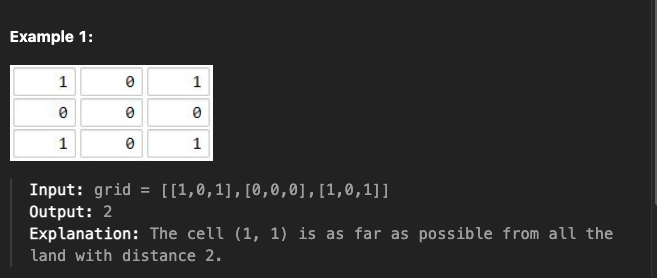

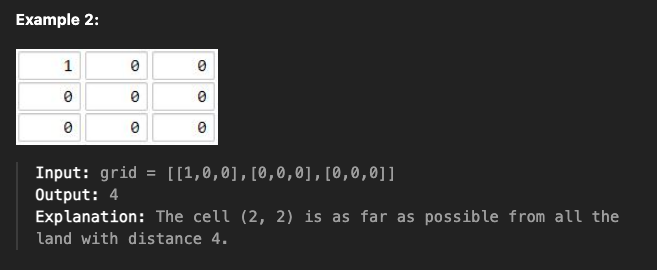

In [ ]:
class Solution {
    public:
    
        bool isValid(int r, int c , int rr, int cc){
            return r>=0 and r<rr and c>=0 and c<cc;	
        }
        
        void bfs(vector<vector<int>>& ma, int &ans){
            int cnt1=0,cnt2=0;
            int rr=ma.size(),cc=ma[0].size();
            queue<vector<int>> q;
            //the above problem was for each 1, find the nearest 0
            //insert 0

            //the below problem is for overall each 0, find the farthest 1
            //insert 1

            for(int r=0;r<rr;r++){ 
                for(int c=0;c<cc;c++){ 
                    if(ma[r][c]==1){
                        q.push({r,c,1});
                        cnt1++;    
                    } 
                    else{
                        cnt2++;
                    }    
                } 
            } 
            if(cnt1==rr*cc or cnt2==rr*cc){
                return;
            } 
            vector<vector<int>> dir={{1,0},{-1,0},{0,1},{0,-1}};
                while(q.size()){
                    auto v=q.front();
                    q.pop();
                    int r=v[0],c=v[1],d=v[2];
                    for(auto vv:dir){
                        int tr=r+vv[0],tc=c+vv[1];
                        if(!isValid(tr,tc,rr,cc)){
                            continue;
                        } 
                        if(ma[tr][tc]==0){
                            ans=max(ans,d);
                            ma[tr][tc]=1;
                            q.push({tr,tc,1+d});
                        }
                    }        
                }   
        } 
        
        int maxDistance(vector<vector<int>>& ma) {
            int ans=-1;
            bfs(ma,ans);
            return ans;
        }
};

# Snake and ladder   
https://www.geeksforgeeks.org/problems/snake-and-ladder-problem4816/1   


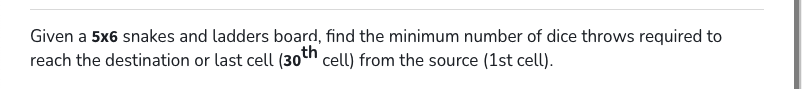

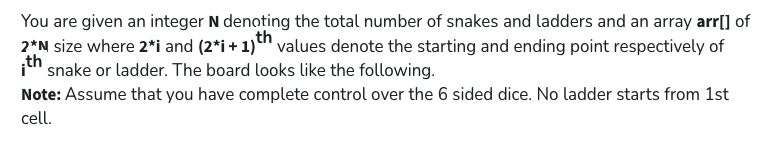

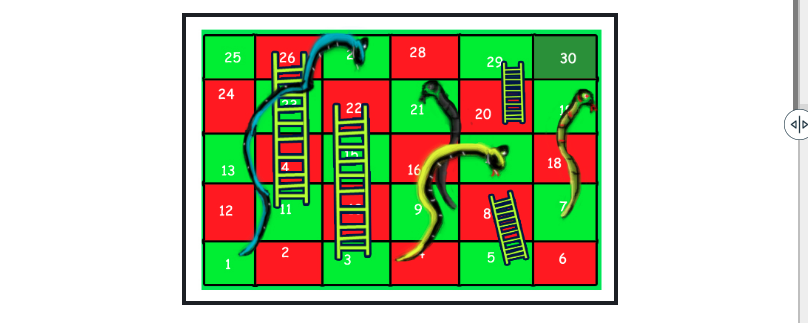

In [ ]:
    int minThrow(int n, int v[]){
        vector<int> conn(31,-1);
        for(int i=0;i<2*n;i+=2){
            conn[v[i]]=v[i+1];
        } 
        //storing all the ladders and snakes location

        vector<int> vis(31,0);
        queue<vector<int>> q;
        q.push({1,0});
        //starting from 1 and steps=0
        vis[1]=1;
        while(q.size()){
            auto x=q.front();
            q.pop();
            int curr=x[0],steps=x[1];
            if(curr==30){
                return steps;
            } 
            for(int pos=curr+1;pos<=curr+6;pos++){
                if(pos>30) break;
                if(vis[pos]){
                    continue;
                } 
                if(conn[pos]==-1){
                    q.push({pos,steps+1});
                } 
                else{
                    q.push({conn[pos],steps+1});
                } 
                vis[pos]=1;
            }
        }
        return -1;
}

# Oranges 

https://leetcode.com/problems/rotting-oranges/description/  

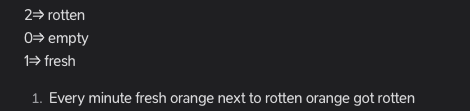


Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.   
Maintain cnt of fresh oranges and finally the became 0 or not

In [ ]:
bool isValid(int r, int c , int rr, int cc){
    return r>=0 and r<rr and c>=0 and c<cc;	
}

int orangesRotting(vector<vector<int>>& ma) {
    vector<vector<int>> directions={{0,-1},{0,1},{-1,0},{1,0}};
    queue <vector<int>> q;
    int cnt=0;
    //maintaining cnt of fresh oranges
    int rr=ma.size(),cc=ma[0].size();
    for(int r=0;r<rr;r++){
        for(int c=0;c<cc;c++){
            if(ma[r][c]==2) q.push({r,c,0});
            if(ma[r][c]==1) cnt++;
        }
    }
    if(cnt==0) return 0;
    int ans=-1;
    while(q.size()){
            auto v=q.front();q.pop();
            int r=v[0],c=v[1],t=v[2];
            ans=max(ans,t);
            for(auto dir: directions){
                int tr=r+dir[0],tc=c+dir[1];
                if(!isValid(tr,tc,rr,cc) or ma[tr][tc]==0 or ma[tr][tc]==2){
                    continue;
                } 
                if(ma[tr][tc]==1){
                    ma[tr][tc]=2;
                    q.push({tr,tc,t+1});
                    cnt--;
                }
            }
        
        }
    return cnt==0?ans:-1;
}